In [ ]:
###CAPSTONE.
##House Price Determination using regression echnique
# References    https://www.kaggle.com/code/bharathbanala/house-price-brb-pred
#               https://www.kaggle.com/code/hongjunepark/house-prices-project/notebook
#               https://www.kaggle.com/code/kanishkpareek/house-price-prediction-neural-step-by-step#Checking-the-corelation-beetween-the-predicted-and-training-column

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Read data set (given as a .csv file) from the local directory
train=pd.read_csv("C:\\Users\\Temitope\\Desktop\\DSI\\Capstone Project\\house-prices-advanced-regression-techniques\\train.csv")

In [4]:
# Check 1st 10 rows
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
#Data clean up
# train with numerical data
train_num = train.select_dtypes(exclude=["object"])
train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


<AxesSubplot:>

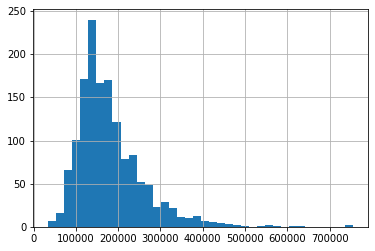

In [10]:
train.SalePrice.hist(bins=38)

In [15]:
# QUANTILE
train_dist = train.quantile([i/20 for i in range(0,20)])
train_dist["quantile"] = train_dist.index
train_dist

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,quantile
0.00,1.00,20.0,21.0,1300.00,1.0,1.0,1872.0,1950.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0,0.00
0.05,73.95,20.0,34.0,3311.70,4.0,4.0,1916.0,1950.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,2.0,2006.0,88000.0,0.05
0.10,146.90,20.0,44.0,5000.00,5.0,5.0,1924.9,1950.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,3.0,2006.0,106475.0,0.10
0.15,219.85,20.0,50.0,6120.00,5.0,5.0,1936.0,1955.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,4.0,2006.0,115000.0,0.15
0.20,292.80,20.0,53.0,7078.40,5.0,5.0,1947.8,1961.8,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,4.0,2006.0,124000.0,0.20
0.25,365.75,20.0,59.0,7553.50,5.0,5.0,1954.0,1967.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0,0.25
0.30,438.70,20.0,60.0,8063.70,5.0,5.0,1958.0,1971.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,135500.0,0.30
0.35,511.65,20.0,60.0,8450.00,5.0,5.0,1961.0,1976.0,0.00,56.65,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,141000.0,0.35
0.40,584.60,30.0,63.0,8793.40,6.0,5.0,1965.0,1980.0,0.00,218.60,...,0.00,0.00,0.0,0.0,0.0,0.0,6.0,2007.0,147000.0,0.40
0.45,657.55,50.0,65.0,9100.00,6.0,5.0,1969.0,1989.0,0.00,312.00,...,6.20,0.00,0.0,0.0,0.0,0.0,6.0,2008.0,155000.0,0.45


<AxesSubplot:xlabel='SalePrice'>

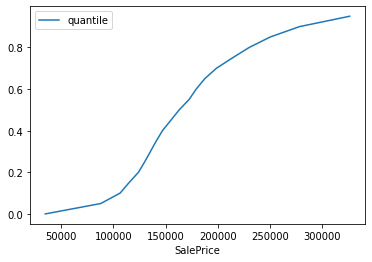

In [16]:
train_dist.plot.line(y="quantile", x = "SalePrice")

In [17]:
train["CumSalePrice"] = train.SalePrice.cumsum()

<AxesSubplot:>

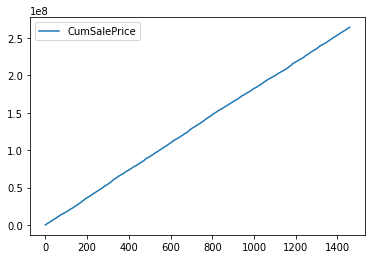

In [18]:
train.plot.line( y = "CumSalePrice")